<a href="https://colab.research.google.com/github/donchanee/programmers_kdt_II/blob/week3%EC%84%A4%EB%8F%99%EC%B0%AC/4_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
tt_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

In [5]:
tt_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 각 Coulum의 데이터 타입 확인하기

tt_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [7]:
# 데이터 전체 정보를 얻는 함수 : .describe()

tt_df.describe()  # 수치형 데이터에 대한 요약만을 제공합니다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
tt_df.corr()  

# 인과성이 있다는 것은 아님. 높은 등급에 앉았다고 -> 생존한 확률이 올라간 것은 아님

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
# 결측치를 확인합니다.

tt_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

In [14]:
## 생존자, 사망자 명수는?

tt_df['Survived'].sum()

342

In [15]:
tt_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

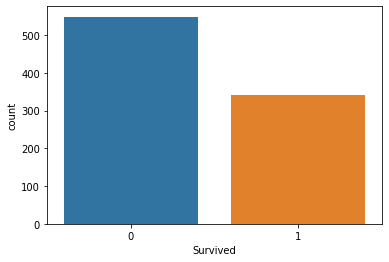

In [17]:
sns.countplot(x='Survived', data=tt_df)
plt.show()

In [18]:
# Pclass에 따른 인원 파악

tt_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [19]:
tt_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

# Survived가 1인 sum

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
tt_df_surv = tt_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

# 생존 비율

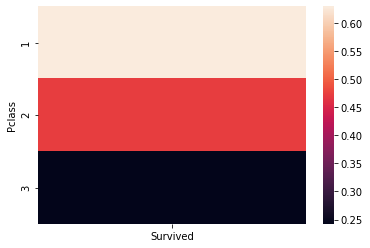

In [24]:
 # 히트맵 사용 시각화
 
 sns.heatmap(tt_df_surv)
 plt.show()

In [25]:
tt_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

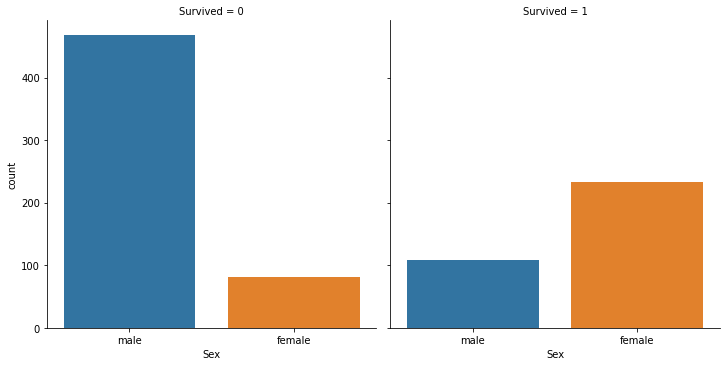

In [27]:
sns.catplot(x='Sex', col='Survived', kind='count', data=tt_df)

In [29]:
# 결측치가 존재하는 Age에 대해 분석을 합니다.

tt_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

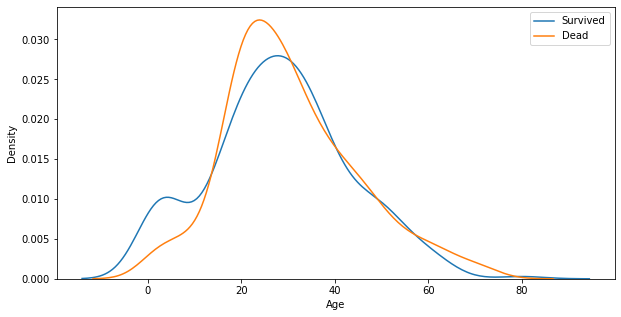

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x=tt_df[tt_df.Survived==1]['Age'], ax=ax)
sns.kdeplot(x=tt_df[tt_df.Survived==0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show()

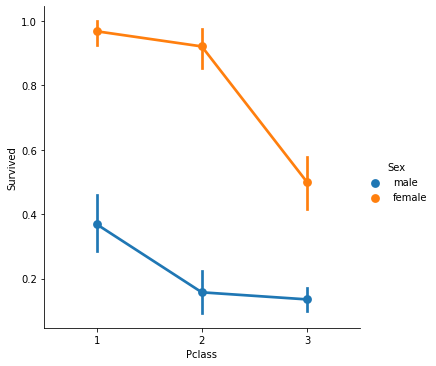

In [33]:
# Sex + Pclass vs Survived

sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=tt_df)
plt.show()

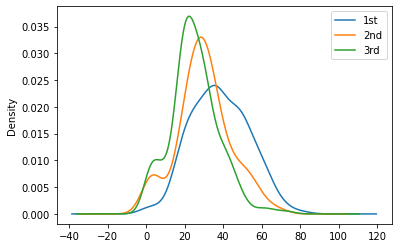

In [37]:
# Age + Pclass

tt_df['Age'][tt_df.Pclass == 1].plot(kind='kde')
tt_df['Age'][tt_df.Pclass == 2].plot(kind='kde')
tt_df['Age'][tt_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st','2nd','3rd'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:
1. 데이터를 톺아봅시다.  
    - 각 데이터는 어떤 자료형을 가지고 있나요?  
    - 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?  
    - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    - 가설은 명확할 수록 좋습니다 ex) *Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!*
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.  
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

In [46]:
tt_df[['Fare', 'Embarked']].groupby('Embarked').sum()

,Fare
Embarked,
C,10072.2962
Q,1022.2543
S,17439.3988


In [47]:
tt_df[['Fare', 'Embarked']].groupby('Embarked').mean()

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


In [48]:
tt_df[['Fare', 'Embarked']].groupby('Embarked').count()

,Fare
Embarked,
C,168
Q,77
S,644


### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()
